In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os
import sys
sys.path.append("../")
%load_ext autoreload
%autoreload 2
from sklearn.model_selection import train_test_split
from dataloaders.patient_dataset import PatientDataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [164]:
# Filips file path
#images_path = "/home/filiptkac/Downloads/abd-trauma-dataset-reduced"
#labels_path = "/home/filiptkac/Downloads/train_reduced.csv"

# michelles files path
images_path = r"C:\Users\miche\Downloads\dataset_reduced\abd-trauma-dataset-reduced"
labels_path = r"C:\wamp64\www\Daredevil\der\sutd-dl-abd-trauma\notebooks\reduced_labels.csv"

df = pd.read_csv(labels_path)


print(df.head(-1))
print(len(df.columns.values))


      patient_id  bowel  extravasation  kidney  liver  spleen
0          10004      1              0       0      1       0
1          10005      1              1       1      1       1
2          10007      1              1       1      1       1
3          10026      1              1       1      1       1
4          10051      1              1       1      1       0
...          ...    ...            ...     ...    ...     ...
2880        9860      1              1       1      1       1
2881        9951      1              1       1      1       1
2882        9960      1              1       1      1       1
2883        9961      1              1       1      1       1
2884        9980      1              1       1      1       0

[2885 rows x 6 columns]
6


5
2886
[1 0 0 1 0]


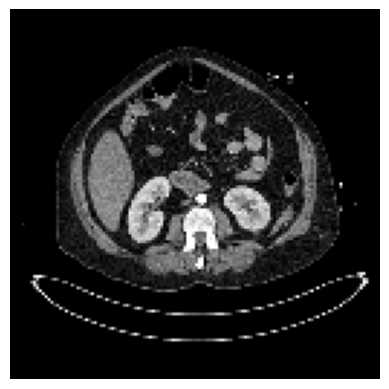

In [165]:
dataset = PatientDataset(images_path, df)
images, labels = dataset[0]
print(len(labels))
print(len(dataset))
print(labels)

def visulize_imageslice(slice, images):
    sample_image = images[0,slice].numpy()
    
    plt.imshow(sample_image, cmap='gray')
    plt.axis('off')
    plt.show()

visulize_imageslice(50, images)

In [167]:
# Filips file path
#images_path = "/home/filiptkac/Downloads/abd-trauma-dataset-reduced"
#labels_path = "/home/filiptkac/Downloads/train_reduced.csv"

# michelles files path
images_path = r"C:\Users\miche\Downloads\dataset_reduced\abd-trauma-dataset-reduced"
labels_path = r"C:\wamp64\www\Daredevil\der\sutd-dl-abd-trauma\notebooks\reduced_labels.csv"

df = pd.read_csv(labels_path)


# Create an empty list to store file pathss
file_paths = []

# Iterate over files in images_path directory
for filename in os.listdir(images_path):
    file_path = os.path.join(images_path, filename)
    # Append the file path to the list
    file_paths.append(file_path)

# Add a new column 'file_path' to the DataFrame
df['file_path'] = file_paths



# Split the dataset into train, validation, and test sets
train_data, val_test_data = train_test_split(df, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(val_test_data, test_size=0.5, random_state=42)

# check it has correct procentage
print(len(train_data)) #80%
print(len(val_data)) #10%
print(len(test_data)) #10%

print('train:', len(train_data)/len(df)*100,'%')
print('val:', len(val_data)/len(df)*100,'%')
print('test:', len(test_data)/len(df)*100,'%')

# drop file name in train, val, test df
train_data = train_data.drop(columns=['file_path'])

train_data = val_data.drop(columns=['file_path'])
train_data = test_data.drop(columns=['file_path'])



2308
289
289
train: 79.97227997227996 %
val: 10.013860013860015 %
test: 10.013860013860015 %


['patient_id' 'bowel' 'extravasation' 'kidney' 'liver' 'spleen'
 'file_path']
7
---
Batch number:  0
Inputs shape: torch.Size([1, 1, 100, 128, 128])
Labels shape: torch.Size([1, 5])
tensor([[1, 1, 1, 0, 1]])


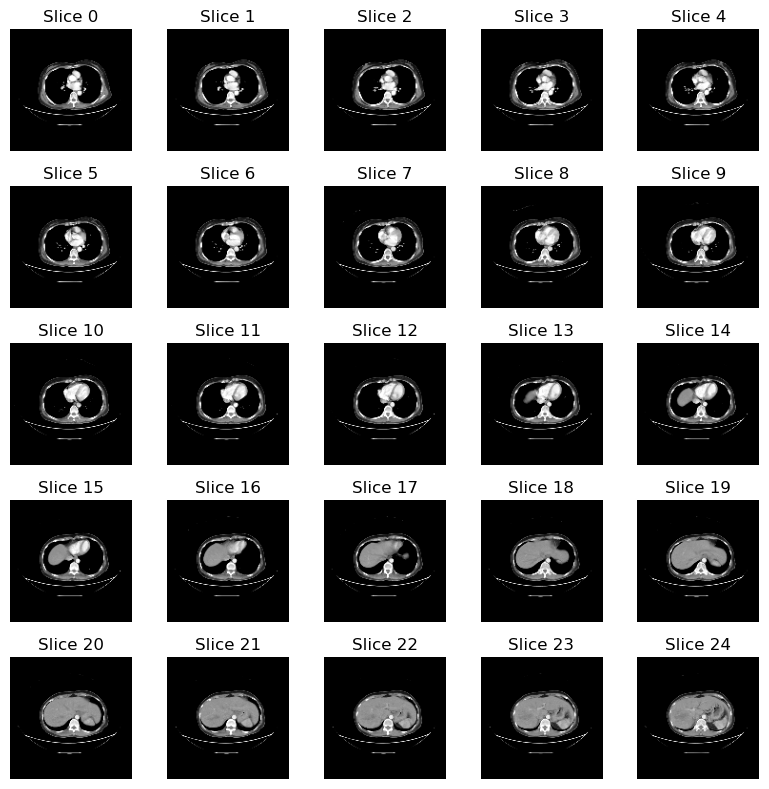

In [170]:
# create preprocced train-, validation-, test- datasets
train_dataset = PatientDataset(images_path, train_data)
val_dataset = PatientDataset(images_path, val_data)
test_dataset = PatientDataset(images_path, test_data)


# create dataloaders for each dataset
batch_size = 1

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # shuffle = true, avoid any bias introduced by the order of the data.
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)




 #Iterate over a few batches of data from train_loader 
header = df.columns.values
print(header)
print(len(header))


for batch_number, batch in enumerate(train_dataloader):
    print("---")
    print("Batch number: ", batch_number)
    if batch_number == 0:

        inputs, labels = batch  # Corrected: Change outputs to labels
        print("Inputs shape:", inputs.shape)
        print("Labels shape:", labels.shape)  # Corrected: Change outputs to labels
        print(labels)

        num_slices = inputs.shape[2]  # Assuming the slices are along the third dimension (index 2)
        num_slices = 25

        fig, axs = plt.subplots(5, 5, figsize=(8, 8))
    
        for i in range(num_slices):
            row = i // 5  
            col = i % 5   
        
            sample_image = inputs[0, 0, i].numpy()  # Accessing each slice
            axs[row, col].imshow(sample_image, cmap='gray')
            axs[row, col].axis('off')
            axs[row, col].set_title(f"Slice {i}")

        plt.tight_layout()
        plt.show()

    break

torch.Size([1, 100, 128, 128])
(5,)


In [ ]:
# create CNN Model